In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.model_selection import cross_val_score

In [2]:
toys1 = pd.read_json('Toys_and_Games_5.json', lines=True)
toys = toys1.loc[np.random.choice(toys1.index, 50000, replace=False)].reindex()

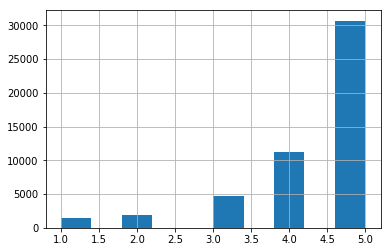

In [3]:
toys['overall'].hist()

In [4]:
toys['positive_rating'] = np.where(toys.overall >=4, 1, 0)

In [5]:
toys

asin   helpful  overall  \
102565  B004Y8TF96    [0, 2]        5   
43307   B000TTOCH4    [2, 2]        5   
119004  B0075XNGGK    [1, 1]        5   
19647   B0002HWFV8    [0, 0]        5   
145458  B00B1Z6FKW    [0, 0]        4   
51555   B0017JBR6O    [0, 0]        5   
160161  B00DKCI1P6    [0, 0]        5   
113874  B006IMX18W    [0, 0]        5   
113277  B006CDDW4A    [2, 2]        5   
136927  B0094J4NLA    [0, 0]        5   
159871  B00DH7P73S    [0, 0]        5   
117106  B006UD2RB6    [0, 0]        5   
141258  B00A8E5GI4    [0, 0]        5   
88704   B00491ORGO    [0, 0]        5   
148411  B00BQYQY8Q    [1, 2]        5   
155213  B00CKH9IIQ    [0, 0]        5   
113099  B006CD33AI    [1, 2]        4   
18936   B000296LSO    [0, 0]        2   
36919   B000LFUKCM    [0, 0]        5   
117812  B006YWI5QY    [0, 0]        5   
131403  B008AG5VOQ    [3, 5]        5   
96205   B004P940TY    [3, 3]        4   
116934  B006TTK7VI  [30, 31]        5   
121497  B007GE75G0    [0, 0]        5   
150940  B00C6BWA8Q    [0, 0]        1   
154080  B00CI6J1XG    [0, 0]        4   
58815   B001TE5C1S    [1, 1]        1   
122974  B007KJECSU    [0, 0]        4   
15610   B00009XNSY    [1, 2]        5   
90895   B004GHNFKK    [0, 0]        4   
...            ...       ...      ...   
78170   B003DJ3A5W    [0, 0]        5   
80858   B003M2KPE4    [3, 3]        3   
158700  B00CYFUWGG    [2, 3]        3   
158369  B00CXEXNL4   [1, 12]        3   
10315   B00005RF5D    [0, 0]        2   
159178  B00D7OAOYI    [0, 0]        3   
78773   B003ESOHSQ    [2, 2]        5   
52026   B0018QQQEO    [0, 0]        2   
35772   B000J52AHW    [1, 1]        5   
66394   B002NPBT50    [0, 1]        4   
29636   B000EUHKUE    [0, 0]        5   
94005   B004MWN1AS    [0, 0]        5   
119306  B0076VIZBW    [0, 0]        5   
19222   B0002CYPO8    [1, 1]        5   
744     0980223644    [1, 1]        5   
155059  B00CJO90ZG    [4, 5]        4   
3242    B00000ISC5    [0, 0]        5   
14093   B00008W72D    [0, 0]        5   
34431   B000HDH57G    [0, 0]        5   
70331   B0031ES9LE    [0, 0]        5   
148351  B00BQIVO2S    [0, 0]        5   
73452   B00383AEZW    [0, 0]        5   
59483   B001UEWH9W    [0, 0]        5   
47705   B0013BL3LK    [0, 0]        5   
64934   B002IMMDN0    [0, 0]        1   
91938   B004INGVHQ    [0, 0]        4   
134379  B008J4IR9U    [0, 1]        5   
139853  B009Y94H1G    [1, 1]        5   
126989  B007XVYT1A    [0, 0]        5   
57625   B001QHHZ72    [0, 0]        4   

                                               reviewText   reviewTime  \
102565  I bought this for my 11month old baby and she ...  01 18, 2013   
43307   Thank you so much! My 9 year old has been writ...  02 13, 2013   
119004  We have a preschooler and a first grader and t...  10 17, 2013   
19647   This is a beautiful, well-made, sturdy puzzle ...  05 24, 2012   
145458  I have been an avid birder for several decades...  12 18, 2013   
51555   This kitchen is perfect. The assembly took a l...  12 22, 2012   
160161                                         great toy!  07 14, 2014   
113874  my son loves themeasy for little ones to work ...   03 5, 2013   
113277  My three year old you has recently seen the Av...  05 16, 2012   
136927  My daughter got this for Christmas and since I...  01 16, 2014   
159871  This EVER AFTER HIGH SECRET HEARTS PASSWORD JO...   03 8, 2014   
117106  Kid loved them for a stocking stuffer last Xma...  03 11, 2013   
141258  My 6 year old son loves everything that has to...  12 25, 2013   
88704   My son enjoys the Cars movie so he likes the g...   11 5, 2012   
148411  My son is really into super heroes and especia...  07 25, 2013   
155213  This Barbie doll is so much fun.  You can make...   01 3, 2014   
113099  The Robots In Disguise Arcee figure is a prett...  01 22, 2013   
18936   The set had no storage box nor stand. Loose to...  07 12, 2014   
36919   This has been fun for both the one year old an...  01 17,

In [6]:
#df = toys[['reviewText', 'positive_rating']]

In [7]:
toys['positive_rating'] = (toys['positive_rating'] == 1)

In [8]:
toys['reviewText'] = toys.reviewText.str.replace(r'[^a-zA-Z\d\s:]', '')
toys['reviewText'] = toys['reviewText'].str.lower()

pos_words = toys.reviewText[toys.overall].str.cat(sep=' ').split()

neg_words = toys.reviewText[toys.overall == False].str.cat(sep=' ').split()

c:\users\stacy steed\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [9]:
# Unique Words
print('negative:', len(np.unique(neg_words)), ' positive:', len(np.unique(pos_words)))

negative: 0  positive: 29


In [10]:
keywords = pd.Series(neg_words).value_counts().keys().ravel()

keywords

array([], dtype=float64)

In [11]:
diff = np.setdiff1d(
        ar1=pd.Series(pos_words).value_counts().keys().ravel(), 
                      ar2=pd.Series(neg_words).value_counts().keys().ravel()
                     )
diff

array(['a', 'additional', 'and', 'around', 'board', 'bought', 'carry',
       'doug', 'for', 'from', 'hope', 'increase', 'is', 'it', 'kids',
       'letter', 'magnetic', 'mellissa', 'nice', 'pieces', 'play', 'the',
       'them', 'thier', 'this', 'time', 'to', 'with', 'works'],
      dtype=object)

In [12]:
new = toys
keywords = diff

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    new[str(key)] = new.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

X = new[keywords]
y = new['positive_rating']

In [13]:
time1 = time.time()

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

In [14]:
cross_val_score(bnb, X, y, cv=5)

array([0.83821618, 0.8381    , 0.8374    , 0.8378    , 0.83808381])

In [15]:
print('Naive Bayes runtime')
print('--- %s seconds ---' % (time.time() - time1))

Naive Bayes runtime
--- 0.3855283260345459 seconds ---


In [16]:
time2 = time.time()

from sklearn.svm import SVC
svc = SVC()

X = new[keywords]
y = new['positive_rating']

svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
cross_val_score(svc, X, y, cv=5)

array([0.83811619, 0.8381    , 0.8381    , 0.8381    , 0.83818382])

In [18]:
print('SVM runtime')
print('--- %s seconds ---' % (time.time() - time2))

SVM runtime
--- 827.8105344772339 seconds ---
